<a href="https://colab.research.google.com/github/Kieunhungtruong/Econometrics/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; gap: 10px;">
    <h1 style="text-align: center; font-size: 26px; font-weight: bold; font-family:'Nunito'; color: purple;">
        Chapter 2
    </h1>
</div>


**Gọi các gói cần thiết trong chương 2**

In [ ]:
#!pip install pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pyreadstat


In [ ]:
# Bảng màu mẫu
palette = ["#53b0ae", "#a31414", "#2b6999", "#e37000", "#b2c615", "#88837d","#B3B3B3"]
labels = ["cyan", "Red", "Dark Blue", "Orange", "Green", "Gray","Light Gray"]

In [ ]:
df, meta = pyreadstat.read_dta("/content/drive/MyDrive/econometrics/rawdata/migration_remittances_16_full.dta", encoding='latin1')
df

,tinh,huyen,xa,diaban,hoso,num_migration,marital_status,HHsize,agehead,num_children0_5,...,durables_share,housing_share,others_share,healthcare_share,education_share,RedRiverDelta,Northmidlandareas,CentralCoast,Centralhighlands,MekongRiverDelta
0,1,1,4,8,14,NaN,0,2.0,63.0,0.0,...,0.000000,0.030590,0.021175,0.004854,0.044689,1.0,0.0,0.0,0.0,0.0
1,1,1,4,8,15,NaN,1,5.0,37.0,0.0,...,0.026955,0.011273,0.006304,0.000797,0.006511,1.0,0.0,0.0,0.0,0.0
2,1,1,4,8,19,NaN,1,2.0,61.0,0.0,...,0.000000,0.027630,0.013743,0.014355,0.000000,1.0,0.0,0.0,0.0,0.0
3,1,1,7,6,13,NaN,1,3.0,62.0,0.0,...,0.018952,0.022694,0.014611,0.002366,0.056978,1.0,0.0,0.0,0.0,0.0
4,1,1,7,6,14,NaN,1,5.0,62.0,0.0,...,0.000000,0.067794,0.004254,0.011658,0.002564,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,96,973,32242,18,14,NaN,1,4.0,57.0,0.0,...,0.006153,0.003076,0.004692,0.004922,0.000000,0.0,0.0,0.0,0.0,1.0
9395,96,973,32242,18,15,NaN,1,3.0,53.0,0.0,...,0.000000,0.007322,0.001611,0.115197,0.000000,0.0,0.0,0.0,0.0,1.0
9396,96,973,32248,9,13,NaN,1,5.0,45.0,0.0,...,0.000000,0.006577,0.005098,0.030914,0.004440,0.0,0.0,0.0,0.0,1.0
9397,96,973,32248,9,14,NaN,1,4.0,36.0,0.0,...,0.000000,0.005244,0.007342,0.013635,0.005874,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Tính các thống kê mô tả
summary = df[['per_expenditure', 'remittances']].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'count'])
summary

,per_expenditure,remittances
mean,2.663517e+04,8.363139e+03
median,2.131150e+04,2.000000e+03
std,2.282951e+04,2.429934e+04
var,5.211867e+08,5.904581e+08
min,1.439000e+03,0.000000e+00
max,4.572832e+05,6.220000e+05
count,9.399000e+03,9.399000e+03


#Time series

In [ ]:
# Đọc và xử lý file năm 2016
df_2016, meta = pyreadstat.read_dta ("/content/drive/MyDrive/econometrics/rawdata/migration_remittances_16_full.dta", encoding='latin1')
df_2014, meta = pyreadstat.read_dta ("/content/drive/MyDrive/econometrics/rawdata/migration_remittances_14_full.dta", encoding='latin1')
df_2012, meta = pyreadstat.read_dta ("/content/drive/MyDrive/econometrics/rawdata/migration_remittances_12_full.dta", encoding='latin1')

df_2016_mean = df_2016[['per_expenditure', 'remittances']].mean().to_frame().T
df_2014_mean = df_2014[['per_expenditure', 'remittances']].mean().to_frame().T
df_2012_mean = df_2012[['per_expenditure', 'remittances']].mean().to_frame().T

df_2016_mean['year'] = 2016
df_2014_mean['year'] = 2014
df_2012_mean['year'] = 2012

In [ ]:
# Gộp cả 3 DataFrame lại
df_merged = pd.concat([df_2012_mean, df_2014_mean, df_2016_mean], ignore_index=True)

# Hiển thị kết quả
print(df_merged.to_string(index=False))

 per_expenditure  remittances  year
    19989.313637  5943.913182  2012
    23533.501102  6664.606447  2014
    26635.171859  8363.138845  2016


#Panel

In [ ]:
panel= pd.read_stata("/content/drive/MyDrive/econometrics/rawdata/panel121416.dta")
panel

,year,hhid,HHsize,agehead,genderhead,female_ratio,migration,remittances,num_eduhead,per_expenditure,children_ratio,elderly_ratio,ln_per_expenditure,agehead2
0,2012.0,3.200000e+01,5.0,59.0,1.0,0.400000,0.0,10000.0,12,66575.000000,0.400000,0.0,11.106085,3481.0
1,2014.0,3.200000e+01,2.0,61.0,1.0,0.500000,1.0,19000.0,12,51281.000000,0.000000,0.5,10.845076,3721.0
2,2016.0,3.200000e+01,2.0,63.0,1.0,0.500000,0.0,60000.0,12,57732.000000,0.000000,0.5,10.963567,3969.0
3,2012.0,3.300000e+01,5.0,33.0,0.0,0.800000,0.0,130000.0,12,59666.199219,0.400000,0.0,10.996521,1089.0
4,2014.0,3.300000e+01,5.0,35.0,0.0,0.600000,0.0,253000.0,12,85886.601562,0.400000,0.0,11.360784,1225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,2014.0,1.680093e+12,4.0,41.0,0.0,0.500000,0.0,3000.0,9,33600.250000,0.250000,0.0,10.422289,1681.0
5732,2016.0,1.680093e+12,4.0,43.0,0.0,0.500000,0.0,0.0,9,36424.500000,0.250000,0.0,10.502996,1849.0
5733,2012.0,1.680093e+12,5.0,45.0,0.0,0.600000,0.0,410.0,6,7207.000000,0.000000,0.0,8.882808,2025.0
5734,2014.0,1.680093e+12,2.0,47.0,0.0,0.500000,1.0,18000.0,7,26588.000000,0.000000,0.0,10.188215,2209.0


#Biểu đồ thể hiện mối quan hệ giữa các biến

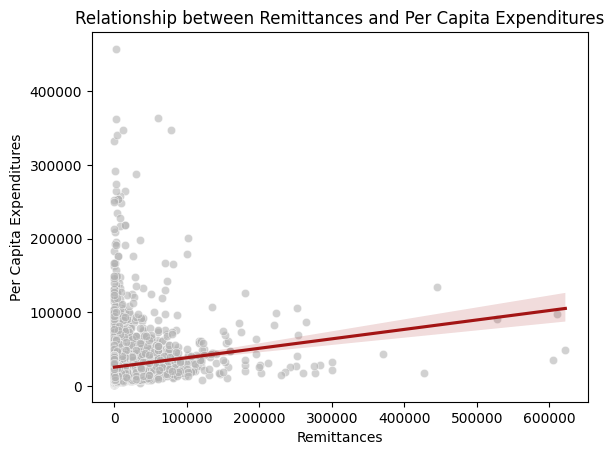

In [ ]:
# Vẽ scatter plot
sns.scatterplot(x='remittances', y='per_expenditure', data=df, color=palette[6], alpha=0.6)
# Vẽ đường hồi quy kèm CI
sns.regplot(x='remittances', y='per_expenditure', data=df, scatter=False, ci=95, color=palette[1])
plt.title('Relationship between Remittances and Per Capita Expenditures')
plt.xlabel('Remittances')
plt.ylabel('Per Capita Expenditures')
plt.show()

#OLS Regression

In [ ]:
X = sm.add_constant(df['remittances']) # Thêm cột intercept (hằng số) vào biến độc lập
model = sm.OLS(df['per_expenditure'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        per_expenditure   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     177.8
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           3.31e-40
Time:                        08:58:10   Log-Likelihood:            -1.0757e+05
No. Observations:                9399   AIC:                         2.152e+05
Df Residuals:                    9397   BIC:                         2.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.556e+04    246.728    103.613      

In [ ]:
# Lấy hệ số hồi quy của 'remittances'
coeff_remittances = results.params['remittances']

# Tính hiệu ứng biên tại remittances == 60000
remittances_value = 60000
# Tính giá trị dự đoán tại remittances = 60000
predicted_value = results.params['const'] + coeff_remittances * remittances_value

print(f"Dự đoán giá trị của per_expenditure khi remittances = 60000: {predicted_value}")

Dự đoán giá trị của per_expenditure khi remittances = 60000: 33247.014484230516


In [ ]:
# Đọc dữ liệu .dta từ Stata
df, meta = pyreadstat.read_dta(
    "/content/drive/MyDrive/econometrics/rawdata/migration_remittances_16_full.dta",
    encoding='latin1')

# Tạo các biến bình phương
df['agehead2'] = df['agehead'] ** 2
df['HHsize2'] = df['HHsize'] ** 2

# Danh sách các biến độc lập đúng như trong Stata
independent_vars = [
    'ln_expenditure', 'agehead', 'agehead2', 'primary', 'secondary',
    'high_school', 'higher_education', 'HHsize', 'HHsize2', 'dependency_ratio',
    'domestic_remittances', 'overseas_remittances', 'urban', 'RedRiverDelta',
    'Northmidlandareas', 'MekongRiverDelta', 'Centralhighlands', 'CentralCoast'
]

# Bỏ các dòng có missing như Stata
all_vars = ['food_share'] + independent_vars
df_model = df[all_vars].dropna()

# Tách X và y
X = df_model[independent_vars]
X = sm.add_constant(X)  # thêm hằng số _cons
y = df_model['food_share']

# Hồi quy tuyến tính (OLS)
model = sm.OLS(y, X).fit()

# In kết quả chi tiết như Stata
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             food_share   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:58:10   Log-Likelihood:                 13344.
No. Observations:                8381   AIC:                        -2.665e+04
Df Residuals:                    8362   BIC:                        -2.652e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8971 

#Vì sao không dùng luôn pandas.read_stata()?
1. pyreadstat là thư viện chuyên đọc file STATA (dta) rất mạnh và nhanh
2. Được viết bằng C → rất nhanh và ổn định hơn cho file .dta nặng hoặc nhiều nhãn phức tạp.
3. Hỗ trợ đọc label (value formats) rõ ràng, có thêm meta.
4. Là backend của pandas.read_stata() luôn đó! Pandas thực ra dùng pyreadstat phía sau.



<h2 style="font-size: 26px; font-weight: bold; font-family:'Nunito'; color: purple;">About the Authors:</h2>

<a href="https://www.linkedin.com/in/truongnhung2002"> Nhung Truong (Kristen Zhang) </a> has a degree in Investment Economics from UEH, with a focus on quantitative research.

## <h3 align="center"> © Nhung Truong. All rights reserved. <h3/>

<p>